## 딥러닝

### 심층신경망

In [1]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기 때문에 다시 다운로드 하지 않음

In [3]:
# 훈련세트, 검정세트 분리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [5]:
# 스케일링
scaler = StandardScaler()
train_scaled  = scaler.fit_transform(train_input.astype(np.float64))
test_scaled  = scaler.transform(test_input.astype(np.float64))

In [6]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [7]:
print(train_scaled.shape, test_scaled.shape)
print(train_target.shape, test_target.shape)

(48000, 784) (10000, 784)
(48000,) (10000,)


#### 심층신경망 만들기1

In [8]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

In [9]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [10]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [11]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [12]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 모델 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4701 - accuracy: 0.8350
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3569 - accuracy: 0.8715
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3202 - accuracy: 0.8848
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2954 - accuracy: 0.8938
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2753 - accuracy: 0.9011
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9069
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2442 - accuracy: 0.9128
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2296 - accuracy: 0.9162
Epoch 9/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2175 - accuracy: 0.9229
Epoch 10/100
1500/1500 [==============================] - 2s 1ms/step -

In [15]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 : 87.8%

375/375 [==============================] - 0s 1ms/step - loss: 0.8606 - accuracy: 0.8788


[0.860578715801239, 0.8787500262260437]

In [16]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 914us/step


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [19]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '엥클부츠']

In [20]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    #plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

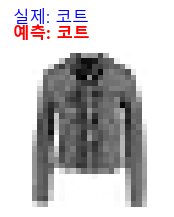

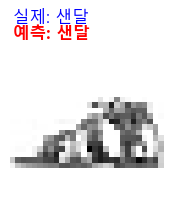

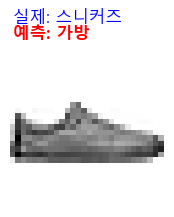

In [21]:
for i in range(10,13):
    show_image(i)

#### ReLU 함수

- 인공신경망 은닉층에 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워있어서 올바른 출력을 못 만듦
- ReLU 함수 : 수정된 선형 유닛 뜻의 함수

    <img src="../image/ml0011.png" width="500">

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할 때 np.reshape() 사용
- Flattem 클래스가 위의 일을 대신해줌

In [22]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [23]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [25]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [26]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [27]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [28]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5296 - accuracy: 0.8121
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3910 - accuracy: 0.8586
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3521 - accuracy: 0.8730
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3319 - accuracy: 0.8809
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3177 - accuracy: 0.8863
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.8906
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2901 - accuracy: 0.8966
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2843 - accuracy: 0.8973
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2772 - accuracy: 0.9006
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.271

In [29]:
model2.evaluate(val_scaled, val_target)
# ReLU함수 사용시, Sigmoid함수 사용시 0.01% 개선

375/375 [==============================] - 0s 959us/step - loss: 0.4431 - accuracy: 0.8843


[0.4430810809135437, 0.8843333125114441]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [30]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [31]:
# 모델 설정, 최적화는 adam클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [32]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5273 - accuracy: 0.8154
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3942 - accuracy: 0.8580
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3532 - accuracy: 0.8706
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3256 - accuracy: 0.8808
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3084 - accuracy: 0.8876
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2920 - accuracy: 0.8919
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2794 - accuracy: 0.8969
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2722 - accuracy: 0.9001
Epoch 9/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2606 - accuracy: 0.9030
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.249

- optimizer 사용시 0.01정도 개선

In [33]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88% - 7정도 차이

375/375 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8884


[0.3351020812988281, 0.8884166479110718]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림.

In [34]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [35]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# 모델 설정, 최적화는 adam클래스만 사용할 것
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [37]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 1ms/step - loss: 0.5871 - accuracy: 0.7926
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4404 - accuracy: 0.8427
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4052 - accuracy: 0.8532
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3807 - accuracy: 0.8609
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3647 - accuracy: 0.8682
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3517 - accuracy: 0.8712
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3406 - accuracy: 0.8738
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3345 - accuracy: 0.8769
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3243 - accuracy: 0.8794
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.315

In [38]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% - 1차이(훈련과 검증사이에 차이가 거의 없음)

375/375 [==============================] - 0s 963us/step - loss: 0.3250 - accuracy: 0.8860


[0.3250153660774231, 0.8859999775886536]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트) 사이에 정확도 차이가 줄어듦
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터만 저장하는 두가지 방법이 존재

In [39]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [40]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### 모델사용

- 파라미터만 저장한 파일을 사용하려면 먼저 모델을 생성해야함

In [41]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten5'),
    keras.layers.Dense(100, activation='relu', name='hidden5'),
    keras.layers.Dropout(0.3, name='dropout5'), 
    keras.layers.Dense(10, activation='softmax', name='output5')
], name='Fashion_MNIST_RELU5')

In [42]:
model5.load_weights('./model4-weight.h5')

In [43]:
model5.summary()

Model: "Fashion_MNIST_RELU5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten5 (Flatten)          (None, 784)               0         
                                                                 
 hidden5 (Dense)             (None, 100)               78500     
                                                                 
 dropout5 (Dropout)          (None, 100)               0         
                                                                 
 output5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 926us/step


- 모델까지 전부 생성해주는 방법

In [45]:
model6 = keras.models.load_model('./model4-whole.h5')

In [46]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model6.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8812


[0.34849920868873596, 0.8812000155448914]

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용

In [48]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU7')

In [49]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [50]:
# 에포크마다 모델 저장기능 콜백
# 최고 상태면 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) 
# 조기종료 콜백
## 두번이상 훈련값이 동일하면 조기종료, 이전 최고상태로 복구
early_stop_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [51]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stop_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5909 - accuracy: 0.7930 - val_loss: 0.4310 - val_accuracy: 0.8394
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4401 - accuracy: 0.8417 - val_loss: 0.3941 - val_accuracy: 0.8533
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3995 - accuracy: 0.8555 - val_loss: 0.3708 - val_accuracy: 0.8628
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3782 - accuracy: 0.8625 - val_loss: 0.3542 - val_accuracy: 0.8679
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3646 - accuracy: 0.8663 - val_loss: 0.3590 - val_accuracy: 0.8666
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3530 - accuracy: 0.8707 - val_loss: 0.3416 - val_accuracy: 0.8749
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3447 - accuracy: 0.8718 - val_loss: 0.3478 - val_accuracy:

In [52]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 979us/step - loss: 0.3292 - accuracy: 0.8796


[0.3291707932949066, 0.8795833587646484]

In [53]:
model7.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8704


[0.36114925146102905, 0.8704000115394592]

In [54]:
early_stop_cb.stopped_epoch

9

- 20번 중 9번 반복에서 조기종료

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `ReLU 함수` : Sigmoid 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`, SGD(확률적 경사하강법), RMSprop...

- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합 막기 위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서 수행
- `콜백` : 에포크마다 모델 저장 또는 조기종료를 위해서 훈련 도중에 다른 기능을 수행하는 것